# Deviations From Normality

In [39]:
%load_ext autoreload
%autoreload 2

import stark
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
hfi_returns = stark.get_hfi_returns()
hfi_returns.head(2)

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106


In [22]:
hfi_returns.shape

(263, 13)

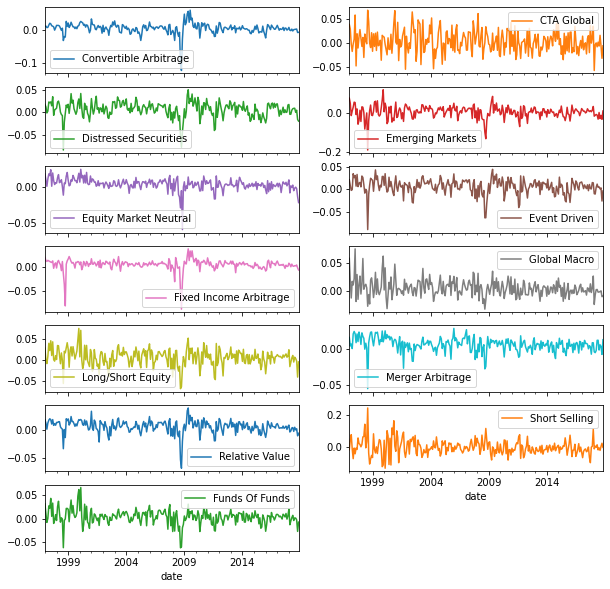

In [36]:
hfi_returns.plot(
    subplots=True,
    layout = (7, 2), 
    figsize=(10, 10)
);

In [31]:
pd.concat(
    [
        hfi_returns.mean(), 
        hfi_returns.median(), 
        hfi_returns.mean() > hfi_returns.median()
    ], 
    axis = "columns", 
).rename(
    columns = 
    {
        0:"mean", 
        1:"median", 
        2:"mean bigger"
    }
)

,mean,median,mean bigger
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


# Formula for Skewedness

$$ S(R) = \frac{E[ (R-E(R)) ^ 3]}{\sigma_R ^ 3} $$

In [41]:
stark.calculate_skewness(hfi_returns).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [44]:
import scipy.stats
scipy.stats.skew(hfi_returns)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

In [46]:
stark.calculate_skewness(hfi_returns).values

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

In [52]:
import numpy as np
normal_returns = np.random.normal(
    loc = 0,
    scale = 0.15,
    size = (100_000, 1)
)
normal_returns.shape

(100000, 1)

In [53]:
stark.calculate_skewness(normal_returns)

-0.01161984772328021

## Kurtosis
$$ K(R) = \frac{E[ (R-E(R)) ^ 4]}{\sigma_R ^ 4} $$

In [54]:
stark.calculate_kurtosis(normal_returns)

3.0112098931109177

### Scipy shows the excess of kurtosis, it is necessary to add 3 at the following result

In [59]:
scipy.stats.kurtosis(normal_returns)

array([0.01120989])

In [60]:
scipy.stats.kurtosis(normal_returns) + 3

array([3.01120989])

In [55]:
stark.calculate_kurtosis(hfi_returns)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

In [57]:
stark.calculate_kurtosis(hfi_returns).values

array([23.28083446,  2.95296037,  7.88998336,  9.25078841, 17.21855526,
        8.03582817, 29.84219928,  5.74167945,  4.52389258,  8.73894979,
       12.12120787,  6.11777175,  7.07015278])

# Statistical Test Jarque Bera

In [61]:
scipy.stats.jarque_bera(normal_returns)

Jarque_beraResult(statistic=2.7739381166960446, pvalue=0.24983138258221582)

In [62]:
stark.is_normal(normal_returns)

True

In [63]:
hfi_returns.aggregate(stark.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [64]:
ffme = stark.get_ffme_returns()
stark.calculate_skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [65]:
stark.calculate_kurtosis(ffme)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [66]:
ffme.aggregate(stark.is_normal)

SmallCap    False
LargeCap    False
dtype: bool